In [1]:
# Import the Libraries that we will be using

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy
import math

## Data Visualization
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
%matplotlib inline

# Forceasting with decompasable model
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm  

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

from sklearn.metrics import mean_squared_error
%matplotlib inline

# For marchine Learning Approach
from statsmodels.tsa.tsatools import lagmat
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


from datetime import datetime
import pandas.core.tools.datetimes as datetools
import datetime
from datetime import timedelta

import warnings
warnings.filterwarnings('ignore')

C:\Users\erick\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
## Loading the Dataset
# Importing the training set
dataset= pd.read_csv('chicken.csv')
dataset.head()

,date,value
0,2001-08-01,65.58
1,2001-09-01,66.48
2,2001-10-01,65.70
3,2001-11-01,64.33
4,2001-12-01,63.23


In [3]:
dataset.describe()

,value
count,180.000000
mean,85.673722
std,16.285349
min,61.490000
25%,72.415000
50%,85.035000
75%,96.040000
max,116.000000


In [6]:
dataset.dtypes

date      object
value    float64
dtype: object

In [7]:
dataset['date'] = pd.to_datetime(dataset['date'])
dataset.dtypes

date     datetime64[ns]
value           float64
dtype: object

In [8]:
#Convert column 'Month' as index

In [9]:
indexedData = dataset.set_index('date')
indexedData.head()

,value
date,
2001-08-01,65.58
2001-09-01,66.48
2001-10-01,65.70
2001-11-01,64.33
2001-12-01,63.23


In [10]:
#1. Checking for Stationarity of the Air Passengers Dataset
#A Time Series is said to be stationary if its statistical properties such as mean, variance remain constant over time and an autocovariance that does not depend on time.
#The basic assumption before applying stochastic models is that the time series should be stationary.

#Plotting the Indexed Data (Date vs Number of passengers)


Text(0.5, 1.0, 'Visualization of stationary dataset')

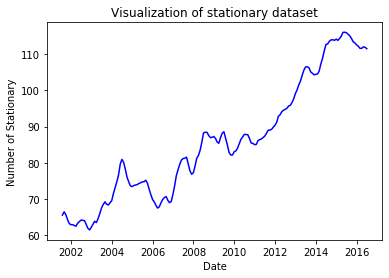

In [11]:
plt.plot(indexedData, color='blue')
plt.xlabel('Date')
plt.ylabel('Number of Stationary')
plt.title("Visualization of stationary dataset")

In [12]:
#We can clearly observe seasonality and positive trend in the above graph.
#The trend is increasing. The mean is not constant. So, our first goal is to make the time series into stationary.

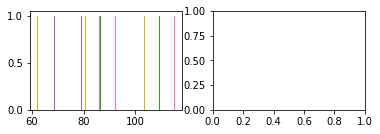

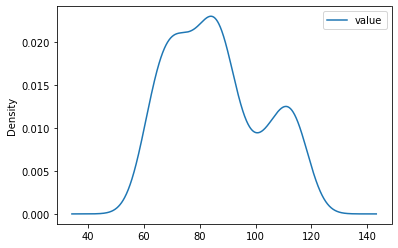

In [13]:
plt.subplot(221)
plt.hist(indexedData)
plt.subplot(222)
indexedData.plot(kind = 'kde')

In [20]:
#Estimating & Eliminating Trend
#We can clearly see that the there is a significant positive trend. So we can apply transformation which will penalize higher values more than smaller values. 
#These can be taking a log, square root, cube root, etc. Lets take a log transform here for simplicity.

#Taking a Log Transformation for Simplicity

#Apply log transform on the indexed_data to penalize higher values more than the smaller values: This can be a log, square root, cube root, etc. Lets take a log transform here for simplicity.

In [14]:
#let's take a log transform for simplicity:
indexedData_logScale= np.log(indexedData)

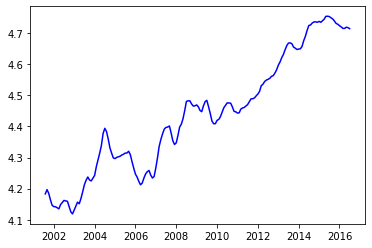

In [15]:
plt.plot(indexedData_logScale, 'blue')

In [16]:
# as you can see we cannot move futhher with this model of using log function to diferencing. 


Text(0.5, 1.0, '4 Months Moving Average')

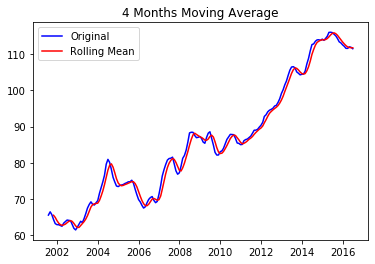

In [18]:
#Plotting the 4-Months Moving Average

four_months_moving_average = indexedData.rolling(window=4).mean()
plt.plot(indexedData, color='blue', label='Original')
plt.plot(four_months_moving_average, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('4 Months Moving Average')

In [27]:
#Plotting the 6-Months Moving Average

Text(0.5, 1.0, '6 Months Moving Average')

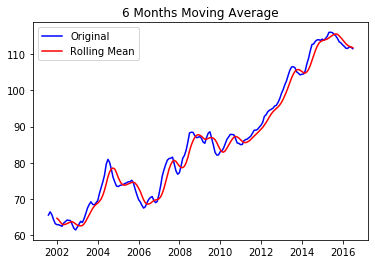

In [29]:
six_months_moving_average = indexedData.rolling(window=6).mean()
plt.plot(indexedData, color='blue', label='Original')
plt.plot(six_months_moving_average, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('6 Months Moving Average')

In [19]:
#Plotting the 8-Months Moving Average

Text(0.5, 1.0, '8 Months Moving Average')

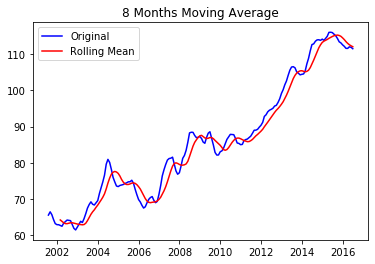

In [20]:
eight_months_moving_average = indexedData.rolling(window=8).mean()
plt.plot(indexedData, color='blue', label='Original')
plt.plot(eight_months_moving_average, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('8 Months Moving Average')

In [21]:
#Plotting the 12-Months Moving Average

Text(0.5, 1.0, '12 Months Moving Average')

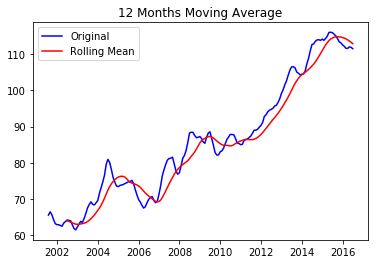

In [22]:
twelve_months_moving_average = indexedData.rolling(window=12).mean()
plt.plot(indexedData, color='blue', label='Original')
plt.plot(twelve_months_moving_average, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('12 Months Moving Average')

In [23]:
##3 As we observe the above four moving averages, the moving average with window '12' is smooth compared to others. So, we can confirm that the seasonality(s) is 12.

### There are two tests to check whether a time series is stationary or not.
### Rolling statistics (Visual test)

### Dickey Fuller test

### Rolling statistics - A visual test
### From the above observations, we can chose 's' as 12. (s=12)

In [24]:
rolmean = indexedData.rolling(window=12).mean()

Text(0.5, 1.0, 'Mean')

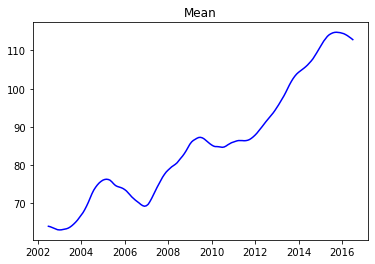

In [25]:
plt.plot(rolmean, 'blue')
plt.title('Mean')

In [26]:
rolstd = indexedData.rolling(window=12).std()

Text(0.5, 1.0, 'Standard Deviation')

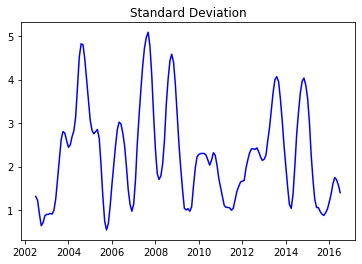

In [27]:
plt.plot(rolstd, 'blue')
plt.title('Standard Deviation')

In [40]:
### As the data is at monthly level (12), we used window as 12. So, we get 'NaN' for the first 11 months.

In [41]:
### Plotting the Rolling Statistics ###

Text(0.5, 1.0, 'Rolling Mean and Standard deviation\n')

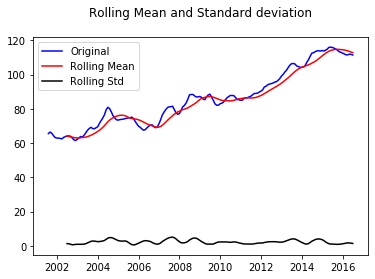

In [28]:
plt.plot(indexedData, color='blue', label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label='Rolling Std')

plt.legend(loc='best')
plt.title('Rolling Mean and Standard deviation\n')

In [29]:
dftest = adfuller(indexedData['value'], autolag='AIC')

In [30]:
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'No. of Lags used', 'Number of observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value

In [31]:
dfoutput

Test Statistic                  -0.701881
p-value                          0.846262
No. of Lags used                13.000000
Number of observations used    166.000000
Critical Value (1%)             -3.470370
Critical Value (5%)             -2.879114
Critical Value (10%)            -2.576139
dtype: float64

In [32]:
### The p-value is very high. It should be very less. We fail to reject the null hypothesis as p-value is high. So, the time series is non-stationary.
### If p-value is less, then we can say that the time series is stationary

In [33]:
## Function to perform both Tests ( Rolling Statistics Test along with the Dickey Fullers Test)
## Let's write a function to perform both the tests for us at a time.

In [34]:
def test_stationary(timeseries):
    
    # Rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    # Plot rolling statistics
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation\n')
    plt.show(block=False)
    
    # Dickey Fuller test
    print('Results of Dickey Fuller Test:\n')
    dftest = adfuller(timeseries['value'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'No. of Lags used', 'Number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

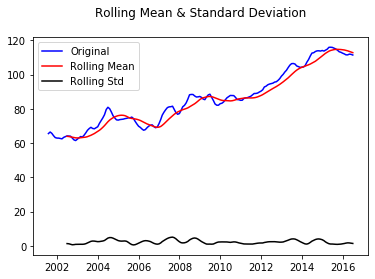

Results of Dickey Fuller Test:

Test Statistic                  -0.701881
p-value                          0.846262
No. of Lags used                13.000000
Number of observations used    166.000000
Critical Value (1%)             -3.470370
Critical Value (5%)             -2.879114
Critical Value (10%)            -2.576139
dtype: float64


In [35]:
test_stationary(indexedData)

In [36]:
### 2. Making the Series Stationary

#Its almost impossible to make a series perfectly stationary, but we try to take it as close as possible.

### There are  2 Major Reasons behind the Non-Stationaurity of a Time Series:

#Trend – varying mean over time. For eg, in this case we saw that on average, the number of passengers was growing over time.

#Seasonality – variations at specific time-frames. eg people might have a tendency to buy cars in a particular month because of pay increment or festivals.

#The underlying principle is to model or estimate the trend and seasonality in the series and remove those from the series to get a stationary series. 

#Then statistical forecasting techniques can be implemented on this series. The final step would be to convert the forecasted values into the original scale by applying trend and seasonality constraints back.

In [37]:
##Transformations to Make the the Time Series Stationary

In [38]:
movingAverage = indexedData_logScale.rolling(window=12).mean()
movingSTD = indexedData_logScale.rolling(window=12).std()

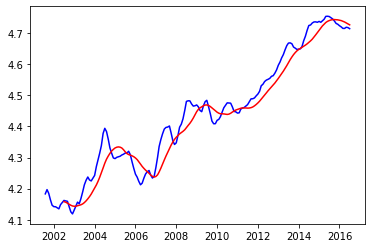

In [39]:
plt.plot(indexedData_logScale, color='blue')
plt.plot(movingAverage, color='red')

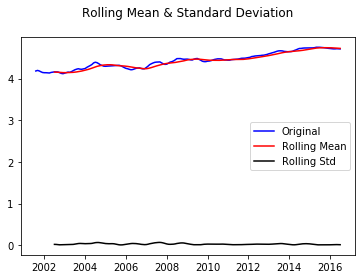

Results of Dickey Fuller Test:

Test Statistic                  -0.989467
p-value                          0.757087
No. of Lags used                13.000000
Number of observations used    166.000000
Critical Value (1%)             -3.470370
Critical Value (5%)             -2.879114
Critical Value (10%)            -2.576139
dtype: float64


In [40]:
test_stationary(indexedData_logScale)

In [51]:
### Lets Try Another transformation

In [41]:
dataLogScaleMinusMovingAverage = indexedData_logScale - movingAverage
dataLogScaleMinusMovingAverage.dropna(inplace=True)
dataLogScaleMinusMovingAverage.head()

,value
date,
2002-07-01,0.003766
2002-08-01,0.004097
2002-09-01,0.006120
2002-10-01,-0.006756
2002-11-01,-0.021162


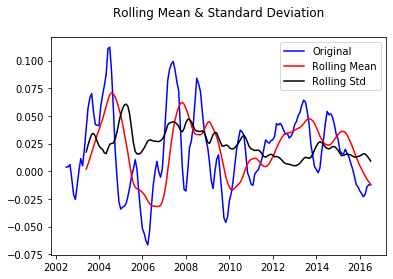

Results of Dickey Fuller Test:

Test Statistic                  -2.849797
p-value                          0.051505
No. of Lags used                13.000000
Number of observations used    155.000000
Critical Value (1%)             -3.473259
Critical Value (5%)             -2.880374
Critical Value (10%)            -2.576812
dtype: float64


In [42]:
test_stationary(dataLogScaleMinusMovingAverage)

In [54]:
##As p-value is less, null hypothesis is rejected. So, it is stationary.

In [59]:
### Lets Try Another transformation

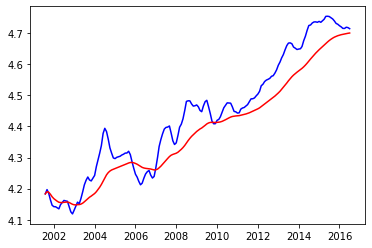

In [43]:
exponentialDecayWeightedAverage = indexedData_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedData_logScale, 'blue')
plt.plot(exponentialDecayWeightedAverage, 'red')

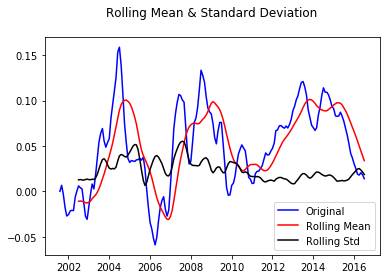

Results of Dickey Fuller Test:

Test Statistic                  -3.211231
p-value                          0.019344
No. of Lags used                13.000000
Number of observations used    166.000000
Critical Value (1%)             -3.470370
Critical Value (5%)             -2.879114
Critical Value (10%)            -2.576139
dtype: float64


In [44]:
dataLogScaleMinusMovingExponentialDecayAverage = indexedData_logScale - exponentialDecayWeightedAverage
test_stationary(dataLogScaleMinusMovingExponentialDecayAverage)

In [45]:
#As p-value is less, null hypothesis is rejected. So, it is stationary.

In [46]:
#We can see from the above test result that p-value is lesser than 0.05 and the test statistic is greater than the critical value at 5%. We can thus decisively conclude that the time series is now stationary

In [47]:
#This Time Series has even lesser variations in mean and standard deviation in magnitude. Also, the test statistic is smaller than the 1% critical value, which is better than the previous case.

In [48]:
### Differencing the Time Series to make it Stationary 
##Let's difference the log transformed data.

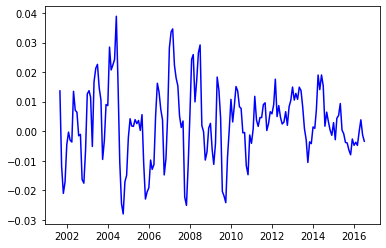

In [49]:
dataLogDiffShifting = indexedData_logScale - indexedData_logScale.shift()
plt.plot(dataLogDiffShifting, color='blue')

In [50]:
dataLogDiffShifting.dropna(inplace=True)

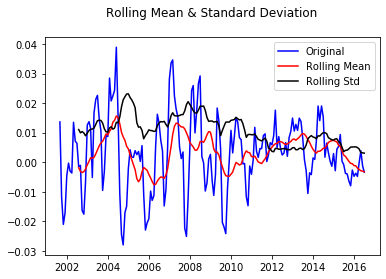

Results of Dickey Fuller Test:

Test Statistic                  -3.598030
p-value                          0.005799
No. of Lags used                12.000000
Number of observations used    166.000000
Critical Value (1%)             -3.470370
Critical Value (5%)             -2.879114
Critical Value (10%)            -2.576139
dtype: float64


In [51]:
test_stationary(dataLogDiffShifting)

In [52]:
#### Null hypothesis is rejected. Therefore, the time series is stationary now after differencing once.

#### We can see that the mean and std variations have small variations with time. Also, the Dickey-Fuller test statistic is less than the 10% critical value, thus the TS is stationary with 90% confidence. We can also take second or third order differences which might get even better results in certain applications.

In [66]:
# Just for reference
decomposition = seasonal_decompose(indexedData_logScale)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

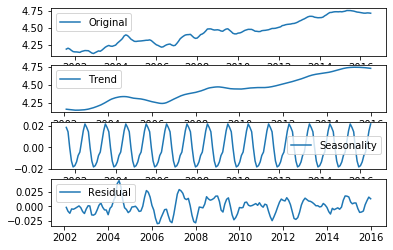

In [68]:
decomposition = seasonal_decompose(indexedData_logScale)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedData_logScale, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residual')
plt.legend(loc = 'best')

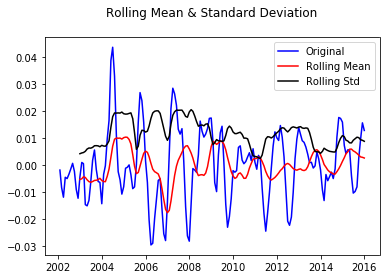

Results of Dickey Fuller Test:

Test Statistic                -8.537382e+00
p-value                        9.994718e-14
No. of Lags used               1.000000e+00
Number of observations used    1.660000e+02
Critical Value (1%)           -3.470370e+00
Critical Value (5%)           -2.879114e+00
Critical Value (10%)          -2.576139e+00
dtype: float64


In [69]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationary(decomposedLogData)

In [ ]:
### The Dickey-Fuller test statistic is significantly lower than the 1% critical value. So this time series is very close to stationary.

In [76]:
### 4. Forecasting a Time Series

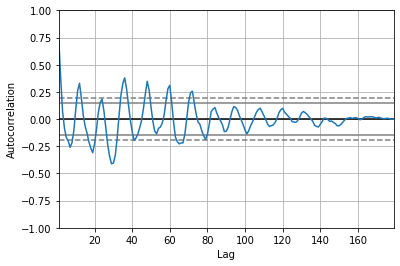

In [70]:
#ACF plot
pd.plotting.autocorrelation_plot(dataLogDiffShifting)

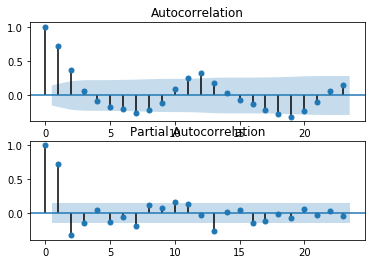

In [71]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.subplot(211)
plot_acf(dataLogDiffShifting, ax=plt.gca())
plt.subplot(212)
plot_pacf(dataLogDiffShifting, ax=plt.gca())
plt.show()

In [73]:
#Another method
#ACF and PACF plots
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(dataLogDiffShifting, nlags=20)
lag_pacf = pacf(dataLogDiffShifting, nlags=20, method='ols')

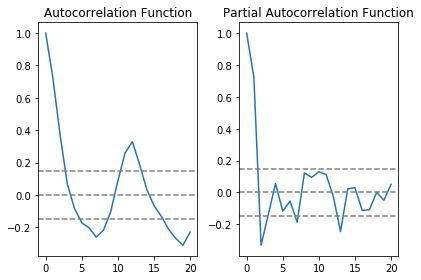

In [74]:
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'gray') #Add a horizontal line across the axis at y = 0.
plt.axhline(y = -1.96/np.sqrt(len(dataLogDiffShifting)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(dataLogDiffShifting)), linestyle = '--', color = 'gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(dataLogDiffShifting)), linestyle='--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(dataLogDiffShifting)), linestyle='--', color = 'gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout() #Automatically adjust subplot parameters to give specified padding.

In [75]:
#In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

#p – The lag value where the PACF chart crosses the upper confidence interval for the first time (p=2).

#q – The lag value where the ACF chart crosses the upper confidence interval for the first time(q=2).

#Now, lets make 3 different ARIMA models considering individual as well as combined effects. We will also print the RSS for each. Please note that here RSS is for the values of residuals and not actual series.

#We need to load the ARIMA model first:

In [76]:
## Another way to Visualize and plot the ACF and PACF plots

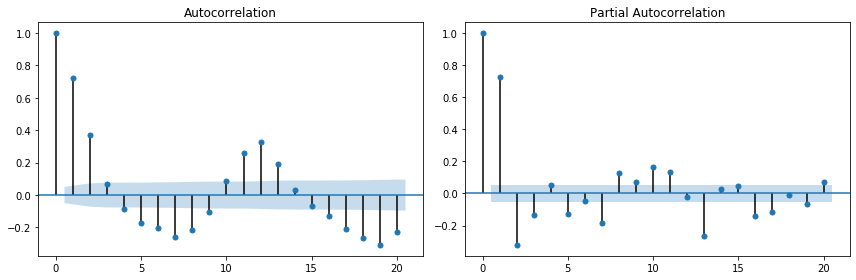

In [77]:
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
plot_acf(dataLogDiffShifting, lags=20, ax=axes[0], alpha=0.5)
plot_pacf(dataLogDiffShifting, lags=20, ax=axes[1], alpha=0.5)
plt.tight_layout()

In [84]:
#The lag value where the PACF graph crosses the upper confidence interval for the first time. If you notice closely, in this case p=2.
#The lag value where the ACF graph crosses the upper confidence interval for the first time. If you notice closely, in this case q=2.

#Let's fit ARIMA model with (2,1,2)


#p = 2, d = 1, q = 2

Plotting the ARIMA model


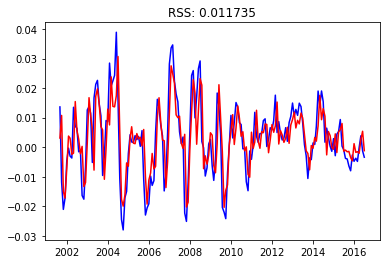

In [78]:
model = ARIMA(indexedData_logScale, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(dataLogDiffShifting, color='blue')
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %4f'% sum((results_ARIMA.fittedvalues - dataLogDiffShifting['value'])**2))
print('Plotting the ARIMA model')

In [79]:

#ARIMA model with (2,1,0)
#p = 2, d = 1, q = 0

Plotting the AR model


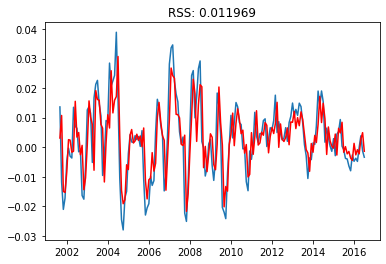

In [83]:
model = ARIMA(indexedData_logScale, order=(2,1,0))
results_AR = model.fit()
plt.plot(dataLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %4f'% sum((results_AR.fittedvalues - dataLogDiffShifting['value'])**2))
print('Plotting the AR model')

In [84]:
#ARIMA model with (0,1,2)
#p = 0, d = 1, q = 2

In [94]:
model = ARIMA(indexedData_logScale, order=(0,1,2))
results_MA = model.fit()
plt.plot(dataLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %4f'% sum((results_MA.fittedvalues - dataLogDiffShifting['value'])**2))
print('Plotting the ARIMA model')

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

In [95]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

date
2001-09-01    0.003101
2001-10-01    0.010751
2001-11-01   -0.014999
2001-12-01   -0.017246
2002-01-01   -0.007266
dtype: float64

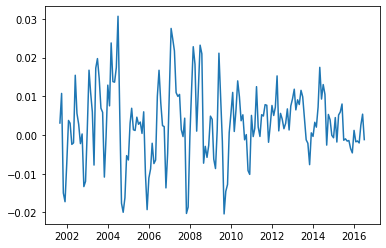

In [92]:
plt.plot(predictions_ARIMA_diff)

In [88]:
#As we compare the above models, the model with parameters (2,1,2) has less RSS score.
#Taking it Back to original scale
#The way to convert the differencing to log scale is to add these differences consecutively to the base number.

In [89]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

date
2001-09-01    0.003101
2001-10-01    0.013852
2001-11-01   -0.001147
2001-12-01   -0.018392
2002-01-01   -0.025658
dtype: float64

In [90]:
predictions_ARIMA_log = pd.Series(indexedData_logScale['value'].ix[0], index=indexedData_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

date
2001-08-01    4.183271
2001-09-01    4.186372
2001-10-01    4.197123
2001-11-01    4.182124
2001-12-01    4.164878
dtype: float64

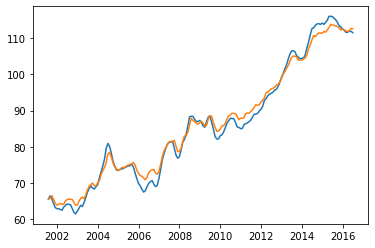

In [91]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedData)
plt.plot(predictions_ARIMA)